<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/2023-06-19-15wk-2-fin.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

**제출은 `*.ipynb`, `*.html`, `*.pdf` 파일로 제출할 것** 

- `ipynb` 파일형태제출을 권장함. 

# imports 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

# `1`. 묵찌빠 (150점)

::: {.callout-note}

### 묵찌빠
ref: <https://namu.wiki/w/묵찌빠>

묵찌빠는 가위바위보의 변형 놀이이다. 보통 가위바위보의 게임과 연이어 진행되는데, 가위바위보 승부 이후 이긴 사람이 공격권을 가지고, 묵(바위)/찌(가위)/빠(보자기) 가운데 하나를 외치는 동시에 말한 것과 일치하도록 손 모양을 바꾼다. 공격권을 가진 사람의 손 모양이 상대(수비권을 가진 사람)의 손 모양과 일치하면 공격권을 가진 사람의 승리한다. 승부가 갈리지 않았을 경우에는 다시 가위바위보를 하는 것이 아니라, 현 상태에서 가위바위보 규칙 상 이긴 사람이 공격권을 가져가게 된다.

:::

`(1)` 아래는 RPS_BASE 클래스의 구현예시이다. 

In [7]:
class RPS_BASE:
    def __init__(self,candidate):
        self.candidate = candidate
        self.actions = list() 
    def __setitem__(self,index,val):
        self.actions[index] = val
    def __getitem__(self,item):
        return self.actions[item]        
    def __len__(self):
        return len(self.actions)
    def __eq__(self,other):
        return self[-1] == other[-1]
    def __gt__(self,other):
        return [self[-1],other[-1]] in [['묵','찌'],['찌','빠'],['빠','묵']]
    def __ge__(self,other):
        return (self == other) or (self > other)
    def __lt__(self,other):
        return not (self >= other)
    def __le__(self,other):
        return (self == other) or (self < other)    
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/>
        기록: {}
        """        
        return html_str.format(self.candidate,self.actions)       
    def pick(self):
        self.actions.append(np.random.choice(self.candidate))        

이 클래스에서 아래와 같은 2명의 플레이어 인스턴스를 생성하라. 

- `a`: ['묵','찌'] 중에 하나를 랜덤으로 선택 
- `b`: ['찌','빠'] 중에 하나를 랜덤으로 선택 

두 인스턴스를 100회 랜덤대결하고 결과를 기록하라. 어떠한 플레이어가 더 유리한가? 

> 답안은 100회중 a몇회 승리, b몇회 승리와 같은 숫자형식으로만 나오면 인정한다. (코드를 정리하거나 별도의 클래스를 만드는 것을 요구하지 않음) 

`(풀이)`

In [23]:
a = RPS_BASE(['묵','찌'])
b = RPS_BASE(['찌','빠'])

In [24]:
rslt = []
for _ in range(100):
    a.pick()
    b.pick()
    if a>b: 
        rslt.append('a')
    elif a==b: 
        rslt.append('-')
    else: 
        rslt.append('b')

In [25]:
{'a의승리':rslt.count('a'),'무승부':rslt.count('-'),'b의승리':rslt.count('b')}

{'a의승리': 53, '무승부': 21, 'b의승리': 26}

---

`(2)` RPS_BASE에서 아래와 같은 두명의 플레이어 인스턴스를 생성하라. 

- `a`: ['묵','찌','빠'] 중 하나를 랜덤으로 선택 
- `b`: ['찌','빠'] 중 하나를 랜덤으로 선택 

아래와 같은 a,b의 attribute을 변경하라. 

In [672]:
a.modes = [None]
a.actions = [None] 
b.modes = [None]
b.actions = [None]

플레이어 a,b를 이용하여 반복적으로 가위바위보 대결을 수행하고 아래와 같이 대결결과에 따라 공격권을 결정하는 함수 `mul`을 만들어라. 

**경우1: 플레이어 a가 승리할 경우**

- a가 공격모드, b가 수비모드가 된다. 
- `a.modes`에는 'Attack' 이 `b.modes`에는 `Defence`가 추가된다. 
- `a.actions`와 `b.actions`는 각각의 플레이어가 선택한 패(묵,찌,빠)가 기록된다. 


**경우2: 플레이어 b가 승리할 경우**

- b가 공격모드, a가 수비모드가 된다. 
- `b.modes`에는 'Attack' 이 `a.modes`에는 `Defence`가 추가된다. 
- `a.actions`와 `b.actions`는 각각의 플레이어가 선택한 패(묵,찌,빠)가 기록된다. 

**경우3: 비길경우**

- 공격권의 변화는 없다. 
- `a.modes`,`b.modes`는 각각 이전의 값이 추가된다. 
- `a.actions`와 `b.actions`는 각각의 플레이어가 선택한 패(묵,찌,빠)가 기록된다. 

아래는 함수 mul을 사용한 예시이다. 

**시점1: 둘다 찌를 내어 공격권을 아무도 획득하지못함**

In [693]:
mul(a,b)

In [702]:
a

In [703]:
b

In [704]:
a.modes

[None, None]

In [705]:
b.modes

[None, None]

**시점2:** 이번에도 둘다 찌를 내어 아무도 공격권을 획득하지 못함 

In [706]:
mul(a,b)

In [707]:
a

In [708]:
b

In [709]:
a.modes

[None, None, None]

In [710]:
b.modes

[None, None, None]

**시점3:** 이번에는 a가 공격권을 획득 (묵>찌)

In [711]:
mul(a,b)

In [712]:
a

In [713]:
b

In [714]:
a.modes

[None, None, None, 'Attack']

In [715]:
b.modes

[None, None, None, 'Defence']

**시점4:** 이번에는 b가 공격권을 획득 (찌>빠)

In [716]:
mul(a,b)

In [717]:
a

In [718]:
b

In [719]:
a.modes

[None, None, None, 'Attack', 'Defence']

In [720]:
b.modes

[None, None, None, 'Defence', 'Attack']

`(풀이)` -- 생략, (3)번 풀이로 대체

---

`(3)` RPS_BASE를 상속받아 MookjjibbaPlayer라는 새로운 클래스를 정의하라. MookjjibbaPlayer 클래스에서 아래의 메소드를 새롭게 정의 혹은 재정의하여 

1. `__init__`
2. `_repr_html_`
3. `__mul__`
4. `reset`

인스턴스가 아래와 같은 동작을 하도록 설계하라. 


**시점0: 생성예시 (`__init__`)**

In [765]:
a=MookjjibbaPlayer(['묵','찌','빠'])
b=MookjjibbaPlayer(['묵','찌','빠'])

In [766]:
a.actions

[None]

In [767]:
a.modes

[None]

::: {.callout-note}

### `__init__` 의 동작

1. 슈퍼클래스(RPS_BASE)의 `__init__`을 동작시킴
2. MookjjibbaPlayer의 인스턴가 가지는 actions, modes 값을 [None] 으로 초기화 
:::

**시점0: 출력예시(`_repr_html_`)** 

In [770]:
a

In [771]:
b

::: {.callout-note}

### `_repr_html_` 의 동작

위와 같이 "낼 수 있는 패", "기록", "모드" 가 함께 출력되도록 설계할 것 

:::

**시점1: 대결 및 결과출력 (`__mul__`, `_repr_html_`)**

In [772]:
a*b

In [773]:
a

In [774]:
b

::: {.callout-note}

### `__mul__` 의 동작

1. 두 플레이어의 대결을 진행
2. 결과를 보고 modes 의 값을 update 

위의 상황은 두 플레이어 모두 "묵"을 내어 어느쪽도 공격권을 가지지 못한 상태를 의미

:::

**시점2: 대결 및 결과출력 (`__mul__`, `_repr_html_`)**

In [775]:
a*b

In [776]:
a

In [777]:
b

::: {.callout-note}

### `__mul__` 의 동작

1. 두 플레이어의 대결을 진행
2. 결과를 보고 modes 의 값을 update 

위의 상황은 a가 묵, b가 빠를 내어 b가 공격권을 획득한 상황을 의미 
:::

**시점3: 대결결과의 초기화 (`reset`)**

In [778]:
a

In [779]:
a.reset()

In [780]:
a

::: {.callout-note}

### `reset` 의 동작

1. 플레이어의 기록을 초기화
2. 플레이어의 모드를 초기화

:::

`(풀이)`

In [26]:
class MookjjibbaPlayer(RPS_BASE):
    def __init__(self,candidate):
        super().__init__(candidate)
        self.modes = [None]
        self.actions = [None]
    def __mul__(self,other):
        self.pick()
        other.pick()
        if self > other:
            self.modes.append('Attack')
            other.modes.append('Defence')
        elif self < other:
            self.modes.append('Defence')
            other.modes.append('Attack')
        else: 
            self.modes.append(self.modes[-1]) 
            other.modes.append(other.modes[-1])
    def _repr_html_(self):
        html_str = """
        낼 수 있는 패: {} <br/>
        기록: {} <br/>
        모드: {} <br/>
        """        
        return html_str.format(self.candidate,self.actions,self.modes)
    def reset(self):
        self.__init__(self.candidate)

**`__init__`, `_repr_html_`** 체크

In [36]:
a=MookjjibbaPlayer(['묵','찌','빠'])
b=MookjjibbaPlayer(['묵','찌','빠'])

In [37]:
a

In [38]:
b

**`__mul__`, `_repr_html_`, `reset`** 체크

In [39]:
for _ in range(3):
    a*b

In [40]:
a

In [41]:
b

In [42]:
a.reset()

In [43]:
a

`(4)` `(3)` 에서 생성된 MookjjibbaPlayer의 두 개의 인스턴스 a,b를 입력으로 받고 최초공격권을 결정하는 함수 `jumpball`을 설계하라. 

아래는 jumpball함수의 사용예시이다.

In [ ]:
a

In [875]:
b

In [876]:
jumpball(a,b)

In [877]:
a

In [878]:
b

> 처음 2번의 가위,바위,보는 비겼으나 이후에 b가 승리하여 초기공격권을 b가 획득하였음. 

`(풀이)` -- 생략, (5)번풀이 참고

`(5)` 지금까지 코드를 바탕으로 

- a: ['묵','찌'] 중 하나를 랜덤으로 고르는 플레이어
- b: ['찌','빠'] 중 하나를 랜덤으로 고르는 플레이어

를 설정하여 100회 가상대결을 진행하라. 100회 가상대결결과를 제시하라.

(참고) -- 아래는 제가 구현한 예시입니다. 참고용일 뿐이며 이와 같은 방식으로 구현할 필요는 없습니다. 

**1. a,b 두명의 플레이어 생성**

In [ ]:
a=MookjjibbaPlayer(['묵','찌'])
b=MookjjibbaPlayer(['찌','빠'])

In [ ]:
a

In [ ]:
b

> a,b 플레이어가 초기화 

**2. a,b 두명의 플레이어를 입력으로 하여 게임1을 생성후 1회 게임진행**

In [ ]:
game = PlayMookjjibba(a,b)

In [ ]:
game.play()

In [ ]:
a

In [ ]:
b

> a가 찌, b가 빠를 내어 최초 공격권을 a가 획득하였지만 이후 공격권을 상실한 상실함. 이후 4번째 가위바위보에서 b가 a가 동시에 찌를 내며 b의 승리로 마무리됨 

**3. game.records 에 b의 승리가 기록되어 있음** 

In [ ]:
game.records 

['b']

**4. 1회 대결기록을 삭제하고 또 다른 게임을 진행: 이번에는 a의 승리**

In [ ]:
game.reset_player_history()

In [ ]:
a

In [ ]:
b

In [ ]:
game.play()

In [ ]:
a

In [ ]:
b

> 공격권은 2번만에 A가 획득, 1번의 공격을 통하여 마무리 

**5. 이번에는 a의 승리가 기록됨**

In [ ]:
game.records

['b', 'a']

`(풀이)`

In [56]:
class PlayMookjjibba:
    def __init__(self,a,b):
        self.a = a
        self.b = b
        self.records = list()
    def reset_player_history(self):
        self.a.reset()
        self.b.reset()
    def record(self):
        if self.a.modes[-1] == 'Attack':
            self.records.append('a')
        else:
            self.records.append('b')
    def jumpball(self):
        self.a * self.b 
        while self.a == self.b:
            self.a * self.b 
    def play(self):
        self.jumpball()
        while self.a != self.b:
            self.a * self.b 
        self.record()

In [57]:
a=MookjjibbaPlayer(['묵','찌'])
b=MookjjibbaPlayer(['찌','빠'])
game = PlayMookjjibba(a,b)

In [58]:
for _ in range(1000):
    game.play()

In [59]:
{'a':game.records.count('a'),'b':game.records.count('b')}

{'a': 678, 'b': 322}

# `2`. 종합문항 (50점)

`(1)` LinearRegression 이라는 이름의 클래스를 만들고 아래의 기능을 넣어라. 

**`__init__`**: "클래스 $\to$ 인스턴스" 인 시점에 길이가 $n$인 numpy array ${\bf x}=(x_1,\dots,x_n)$, ${\bf y}=(y_1,\dots,y_n)$을 입력으로 받아 내부에 저장한다. 

**`fit`**: fit은 내부에 저장된 ${\bf x}$, ${\bf y}$를 이용하여 $\hat{\bf y}=(\hat{y}_1,\dots,\hat{y}_n)$을 계산하는 역할을 한다. 계산은 아래의 수식을 이용한다. 
$$\hat{\bf y}= {\bf X}({\bf X}^T {\bf X})^{-1}{\bf X}^T {\bf y}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n \end{bmatrix}$$ 

**`plot`**: plot은 $(x_i,y_i)$와 $(x_i,\hat{y}_i)$를 시각화하는 역할을 한다. 

아래의 자료를 LinearRegression의 입력으로 받고 시각화하는 분석을 수행하라. 

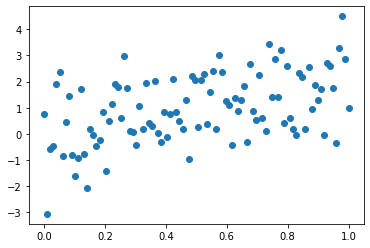

In [62]:
x = np.linspace(0,1,100)
y = 2*x + np.random.normal(size=100)
plt.plot(x,y,'o')

`(풀이)`

In [63]:
class LinearRegression: 
    def __init__(self,x,y):
        self.x = x
        self.y = y 
    def fit(self):
        n = len(self.x)
        self.X = np.stack([np.ones(n),self.x],axis=1)
        self.yhat = self.X@np.linalg.inv(self.X.T@self.X)@self.X.T@self.y 
    def plot(self):
        plt.plot(self.x,self.y,'o',label=r'$(x_i,y_i)$')
        plt.plot(self.x,self.yhat,'--',label=r'$(x_i,\hat{y}_i)$')
        plt.legend()

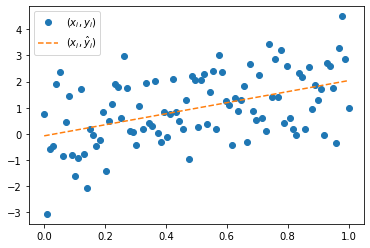

In [64]:
linreg = LinearRegression(x,y)
linreg.fit()
linreg.plot()

> 5월24일 12wk-2 숙제참고

`(2)` 앞면과 뒷면이 나올 확률이 각각 1/2인 동전을 생각하자. 하니와 규빈은 이 동전을 연속으로 던져서 아래와 같은 룰을 정하여 내기를 하였다. 

- 동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (뒷면,앞면) 이 나오면 하니의 승리
- 동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (뒷면,뒷면) 이 나오면 규빈의 승리 

이 내기는 하니가 유리한가? 규빈이 유리한가? 시뮬레이션을 통해 검증하라. 

::: {.callout-note}

**hint**: 똑같이 유리하다

:::

`(풀이)`

**Step1** CoinFlipper 설계

In [241]:
class CoinFlipper: 
    def __init__(self):
        self.coins = list()
        self.win_cond = {'하니':[],'규빈':[]}
        self.winner = str()        
    def __iter__(self):
        return self 
    def __next__(self):
        self.coins.append(np.random.choice(['앞면','뒷면']))
        if self.coins[-2:] == self.win_cond['하니']:
            self.winner = '하니'
            raise StopIteration
        elif self.coins[-2:] == self.win_cond['규빈']:
            self.winner = '규빈'
            raise StopIteration        
        else:
            pass
    def __call__(self,win_cond):
        self.win_cond = win_cond
        for _ in self:
            pass 
    def __repr__(self):
        repr_str = '하니의 승리조건: {}\n규빈의 승리조건: {}\n동전을 던진결과들: {}\n최종승리자: {}'.format(
            self.win_cond['하니'],
            self.win_cond['규빈'],
            self.coins,
            self.winner
        )
        return repr_str

In [242]:
coin_fliper = CoinFlipper()

In [235]:
coin_fliper

하니의 승리조건: []
규빈의 승리조건: []
동전을 던진결과들: []
최종승리자: 

In [236]:
win_cond = {
    '하니':['앞면','뒷면'],
    '규빈':['뒷면','앞면']
}
coin_fliper(win_cond)

In [237]:
coin_fliper

하니의 승리조건: ['앞면', '뒷면']
규빈의 승리조건: ['뒷면', '앞면']
동전을 던진결과들: ['뒷면', '뒷면', '뒷면', '뒷면', '앞면']
최종승리자: 규빈

**Step2:** 100회 대결진행 

In [238]:
coinfliper_lst = [CoinFlipper() for _ in range(100)]
winners = [] 
for coinfliper in coinfliper_lst:
    coinfliper(win_cond)
    winners.append(coinfliper.winner)

In [239]:
{'하니':winners.count('하니'), '규빈':winners.count('규빈')}

{'하니': 51, '규빈': 49}

---

참고로 $n$회 대결결과는 아래와 같이 조회가능 

In [240]:
coinfliper_lst[3]

하니의 승리조건: ['앞면', '뒷면']
규빈의 승리조건: ['뒷면', '앞면']
동전을 던진결과들: ['앞면', '앞면', '뒷면']
최종승리자: 하니

`(3)` 앞면과 뒷면이 나올 확률이 각각 1/2인 동전을 생각하자. 하니와 규빈은 이 동전을 연속으로 던져서 아래와 같은 룰을 정하여 내기를 하였다. 

- 동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (앞면,뒷면) 이 나오면 하니의 승리
- 동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (뒷면,뒷면) 이 나오면 규빈의 승리 

이 내기는 하니가 유리한가? 규빈이 유리한가? 시뮬레이션을 통해 검증하라. 

::: {.callout-note}

**hint**: 이 내기는 하니가 유리하다.

:::

`(풀이)`

In [246]:
win_cond = {
    '하니':['앞면','뒷면'],
    '규빈':['뒷면','뒷면']
}
coin_fliper(win_cond)

In [247]:
coinfliper_lst = [CoinFlipper() for _ in range(100)]
winners = [] 
for coinfliper in coinfliper_lst:
    coinfliper(win_cond)
    winners.append(coinfliper.winner)

In [248]:
{'하니':winners.count('하니'), '규빈':winners.count('규빈')}

{'하니': 73, '규빈': 27}

`(4)` Time을 상속받아 Init 클래스를 만들고 `__repr__`을 조작하여 아래와 같이 인스턴스 생성시점을 출력하는 기능을 구현하라. 

In [230]:
class Time:
    def time(self):
        return datetime.datetime.now().strftime('%y-%m-%d %X')

`(풀이)`

In [249]:
class Init(Time):
    def __init__(self):
        self.init_time = self.time()
    def __repr__(self):
        return '인스턴스생성시점: {}'.format(self.init_time)

In [250]:
a = Init()

In [251]:
a

인스턴스생성시점: 23-06-20 14:05:58

In [252]:
b = Init()

In [253]:
a,b

(인스턴스생성시점: 23-06-20 14:05:58, 인스턴스생성시점: 23-06-20 14:05:59)

`(5)` tuple 클래스와 아래의 Check를 상속받아 아래와 같은 역할을 하는 새로운 Tuple 클래스를 만들라. 

In [254]:
class Check:
    def ckeck(self):
        return [l for l in dir(self) if l[0]!='_']

`(풀이)`

In [271]:
class Tuple(Check,tuple):
    def freq(self):
        return {s:self.count(s) for s in set(self)}
    def __repr__(self):
        return super().__repr__() + '\n' +'methods={}'.format(self.ckeck())

In [272]:
tpl = Tuple('asdfassdfsasdf')
tpl # 값과 함께 사용가능한 메소드가 함께 출력 

('a', 's', 'd', 'f', 'a', 's', 's', 'd', 'f', 's', 'a', 's', 'd', 'f')
methods=['ckeck', 'count', 'freq', 'index']

In [273]:
tpl.freq()

{'f': 3, 'd': 3, 's': 5, 'a': 3}

`(6)` 아래와 같은 클래스를 고려하자. 

In [1103]:
class Init(object):
    def __init__(self,value):
        self.value = value
        
class Times2(Init):
    def __init__(self,value):
        super().__init__(value)
        self.value = self.value * 2
        
class Plus5(Init):
    def __init__(self,value):
        super().__init__(value)
        self.value = self.value + 5

`Plus5`와 `Times2`를 상속하여 적당한 클래스 `Times2Plus5`를 정의하고 생성과 동시에 $x \to (x\times 2)+5$ 를 수행도록 하라. 

`(풀이)`

In [ ]:
class Times2Plus5(Plus5,Times2):
    def __init__(self,value):
        super().__init__(value)

**사용예시**

In [1105]:
a=Times2Plus5(0)
a.value

5

In [1106]:
a=Times2Plus5(1)
a.value

7

In [1107]:
a=Times2Plus5(5)
a.value

15

`(7)` 아래의 함수가 있다고 하자. 

In [276]:
def f(x): 
    return np.sin(x)

적당한 함수 `derivate`를 정의하여 함수를 입력으로 받으면 그 도함수를 출력으로 리턴하도록 하라. 아래의 코드를 이용하여 검증하라. 

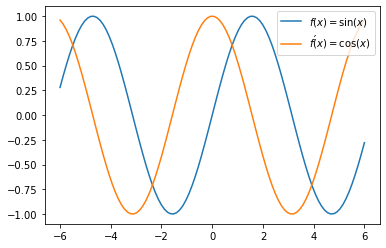

In [277]:
x = np.linspace(-6,6,100)
plt.plot(x,f(x),label=r'$f(x)=\sin(x)$')
plt.plot(x,(derivate(f))(x),label=r'$f\'(x)=\cos(x)$')
plt.legend()

`(풀이)`

In [280]:
def f(x): 
    return np.sin(x)
def derivate(f): 
    # step1: 함수오브젝트 f는 입력으로 받은상태 
    # step2: 함수오브젝트 f를 이용하여 df라는 함수를 정의 
    def df(x): 
        h=0.000000000001
        return (f(x+h)-f(x))/h 
    # step3: 정의된 df를 리턴
    return df

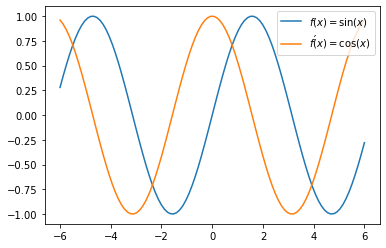

In [281]:
x = np.linspace(-6,6,100)
plt.plot(x,f(x),label=r'$f(x)=\sin(x)$')
plt.plot(x,(derivate(f))(x),label=r'$f\'(x)=\cos(x)$')
plt.legend()

`(8)` Student 클래스를 생성지침 및 사용예시를 참고하여 설계하라. 

**`생성지침`**

**attributes**

- `name`: 이름을 저장하는 변수
- `age`: 나이를 저장하는 변수
- `semester`: 학기를 저장하는 변수

**methods**

- `__init__`: name, age, semester 세 가지 매개변수를 입력받아 인스턴스의 attribute로 저장
- `__str__`: 인스턴스의 정보(이름,나이,학기)를 문자열 형태로 반환

**`사용예시`**

In [224]:
# 사용 예시
boram = Student(name='김보람', age=20, semester=1)
print(boram)

이름: 김보람
나이: 20
학기: 1


`(풀이)`

In [331]:
class Student:
    def __init__(self,name='김보람',age=20,semester=0): 
        self.name = name
        self.age = age
        self.semester = semester
    def __str__(self):
        print_str = '''이름: {}\n나이: {}\n학기: {}'''.format(self.name,self.age,self.semester)
        return print_str

In [332]:
# 사용 예시
boram = Student(name='김보람', age=20, semester=1)
print(boram)

이름: 김보람
나이: 20
학기: 1


`(9)` 8의 클래스를 상속받아 Student2 만들라. `__add__` 재정의하여 Student2의 인스턴스가 아래와 같이 동작하도록 하라. 

In [336]:
boram = Student2()

입학을 축하합니다. 당신의 나이는 20이고 현재 학기는 0학기 입니다.


In [337]:
boram + '등록'+ '휴학' + '등록' + '휴학'
boram

> 4학기가 지났으므로 나이는 22살이 된다. 4학기중 2학기만 등록하였으므로 현재는 2학기를 마친상태이다. 

`(풀이)`

In [333]:
class Student2(Student):
    def __init__(self,name='김보람',age=20,semester=0): 
        super().__init__()
        print("입학을 축하합니다. 당신의 나이는 {}이고 현재 학기는 {}학기 입니다.".format(self.age,self.semester))
    def __add__(self,registration_status): 
        if registration_status=='휴학': 
            self.age=self.age+0.5
        elif registration_status=='등록':
            self.age=self.age+0.5 
            self.semester= self.semester+1 
        return self
    def _repr_html_(self):
        html_str = """
        나이: {} <br/>
        학기: {} <br/>
        """
        return html_str.format(self.age,self.semester)

In [334]:
boram = Student2()

입학을 축하합니다. 당신의 나이는 20이고 현재 학기는 0학기 입니다.


In [335]:
boram + '등록'+ '휴학' + '등록' + '휴학'
boram

`(10)` 적당한 클래스를 선언하여 $f(x)=x+{\tt const}$를 수행하는 함수를 생성하도록 하라.

**사용예시1**

In [265]:
f = AddConstant(5) # f(x) = x+5 

In [266]:
f(10)

15

**사용예시2**

In [267]:
f = AddConstant(-3) # f(x) = x-3

In [268]:
f(10)

7

`(풀이)`

In [264]:
class AddConstant: 
    def __init__(self,const):
        self.const = const 
    def __call__(self,x):
        return x + self.const

In [269]:
f = AddConstant(5) # f(x) = x+5 
f(10)

15

In [270]:
f = AddConstant(-3) # f(x) = x-3
f(10)

7